Plant Disease Detection using MobileNet Version 1 First 20 Epochs

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Performing Data Augmentation Using rotation, width shift, height shift and horizontal flipping 
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest'
)
 
validation_datagen = ImageDataGenerator(rescale=1./255)
 
# Change the batchsize according to system RAM
train_batchsize = 64
val_batchsize = 54
 
train_generator = train_datagen.flow_from_directory(
        '/content/drive/My Drive/Bihar_Crops/train',
        target_size=(224,224),
        batch_size=train_batchsize,
        class_mode='categorical')
 
validation_generator = validation_datagen.flow_from_directory(
        '/content/drive/My Drive/Bihar_Crops/valid',
        target_size=(224,224),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=True)

Found 31373 images belonging to 17 classes.
Found 7811 images belonging to 17 classes.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
from tensorflow.keras.applications.mobilenet import MobileNet
xcep = MobileNet(weights='imagenet', include_top=False, input_shape=(224,224, 3)) 

17227776/17225924 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
 
# Create the model
model1 = models.Sequential()
 
model1.add(xcep)
# Add new layers
model1.add(layers.Flatten())
model1.add(layers.BatchNormalization())
model1.add(layers.Dropout(0.5))

model1.add(layers.Dense(17, activation='softmax'))
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Model)   (None, 7, 7, 1024)        3228864   
_________________________________________________________________
flatten_1 (Flatten)          (None, 50176)             0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 50176)             200704    
_________________________________________________________________
dropout_2 (Dropout)          (None, 50176)             0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 50176)             200704    
_________________________________________________________________
dropout_3 (Dropout)          (None, 50176)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 17)               

In [ ]:
import tensorflow
print(tensorflow.__version__)

2.2.0


In [ ]:
# compiling the model   
model1.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])


In [ ]:
# Train the model
history = model1.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)

Epoch 1/20
491/490 [==============================] - 465s 947ms/step - loss: 2.7422 - acc: 0.2873 - val_loss: 0.9009 - val_acc: 0.7212
Epoch 2/20
491/490 [==============================] - 463s 942ms/step - loss: 1.4104 - acc: 0.5780 - val_loss: 0.5221 - val_acc: 0.8342
Epoch 3/20
491/490 [==============================] - 463s 943ms/step - loss: 0.9398 - acc: 0.7048 - val_loss: 0.3707 - val_acc: 0.8784
Epoch 4/20
491/490 [==============================] - 465s 946ms/step - loss: 0.7067 - acc: 0.7734 - val_loss: 0.2948 - val_acc: 0.9039
Epoch 5/20
491/490 [==============================] - 464s 945ms/step - loss: 0.5738 - acc: 0.8167 - val_loss: 0.2443 - val_acc: 0.9190
Epoch 6/20
491/490 [==============================] - 463s 943ms/step - loss: 0.4642 - acc: 0.8496 - val_loss: 0.2130 - val_acc: 0.9297
Epoch 7/20
491/490 [==============================] - 465s 946ms/step - loss: 0.4046 - acc: 0.8679 - val_loss: 0.1915 - val_acc: 0.9388
Epoch 8/20
491/490 [============================

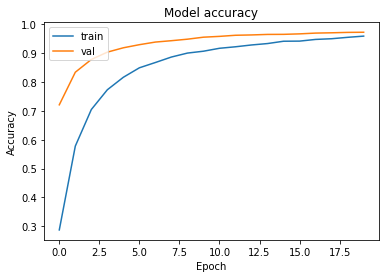

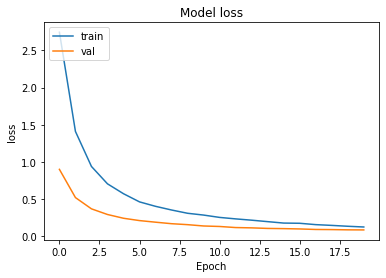

In [ ]:
import matplotlib.pyplot as plt

# training and accuracy value
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train','val'],loc='upper left')
plt.show()

# training and loss value
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(['train','val'],loc='upper left')
plt.show()

In [ ]:
model1.save('/content/drive/My Drive/SIH_colab_notebooks/pd_mnv1_1.h5')